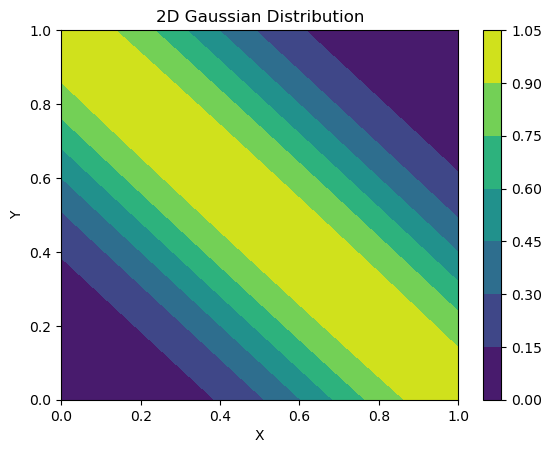

In [74]:
import numpy as np
import matplotlib.pyplot as plt

def plot_2d_gaussian(mean, precision):
    # Generate grid points
    x = np.linspace(-10, 10, 1000)
    y = np.linspace(-10, 10, 1000)
    X, Y = np.meshgrid(x, y)
    pos = np.empty(X.shape + (2,))
    pos[:, :, 0] = X
    pos[:, :, 1] = Y

    # Calculate the Gaussian distribution
    Z = np.exp(-0.5 * np.einsum('...k,kl,...l->...', pos - mean, precision, pos - mean))

    # Plot the Gaussian distribution
    plt.contourf(X, Y, Z, cmap='viridis')
    plt.colorbar()
    plt.xlabel('X')
    plt.ylabel('Y')
    plt.xlim([0,1])
    plt.ylim([0,1])
    plt.title('2D Gaussian Distribution')
    plt.show()

# Example usage
mean = [0.5, 0.5]
precision = [[10, 10], [10, 10.1]]
plot_2d_gaussian(mean, precision)


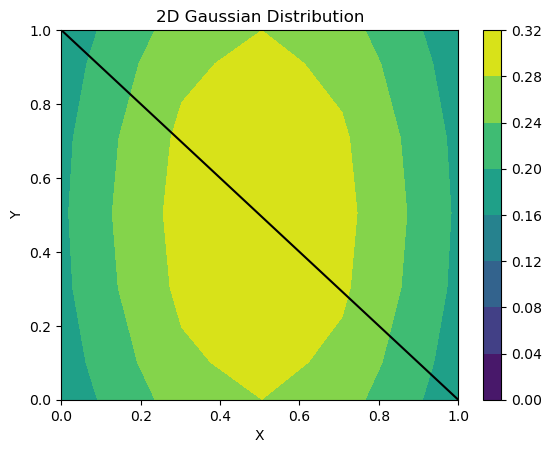

In [46]:
import numpy as np
import matplotlib.pyplot as plt

def plot_2d_gaussian(mean, covariance):
    # Generate grid points
    x = np.linspace(-10, 10, 100)
    y = np.linspace(-10, 10, 100)
    X, Y = np.meshgrid(x, y)
    pos = np.empty(X.shape + (2,))
    pos[:, :, 0] = X
    pos[:, :, 1] = Y

    # Calculate the Gaussian distribution
    inv_covariance = np.linalg.inv(covariance)
    diff = pos - mean
    exponent = -0.5 * np.einsum('...k,kl,...l->...', diff, inv_covariance, diff)
    Z = np.exp(exponent) / (2 * np.pi * np.sqrt(np.linalg.det(covariance)))

    # Plot the Gaussian distribution
    plt.contourf(X, Y, Z, cmap='viridis')
    plt.colorbar()
    plt.xlabel('X')
    plt.ylabel('Y')
    plt.title('2D Gaussian Distribution')
    plt.plot(x, 1-y, 'k')
    plt.xlim([0,1])
    plt.ylim([0,1])
    plt.show()

# Example usage
mean = np.array([0.5, 0.5])
rho = 0
s1 = 0.5
s2 = 1.
covariance = np.array([[s1**2, rho*s1*s2], [rho*s1*s2, s2**2]])
# covariance = np.array([[1.1, -1], [-1, 1]])
plot_2d_gaussian(mean, covariance)
